In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [242]:
data = pd.read_csv('/Users/yuxiding/Desktop/data_hall_raw.csv')
data['Display Time'] = data['Display Time'].apply(lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data['time_gap'] = data['Display Time']- data['Display Time'].shift(1)
testdata = data[data['subjectId']=='1636-69-032']
testdata

,Display Time,GlucoseValue,subjectId,time_gap
5464,2016-01-13 12:58:17,122,1636-69-032,210 days 15:39:40
5465,2016-01-13 13:03:17,123,1636-69-032,0 days 00:05:00
5466,2016-01-13 13:08:17,124,1636-69-032,0 days 00:05:00
5467,2016-01-13 13:13:17,128,1636-69-032,0 days 00:05:00
5468,2016-01-13 13:18:17,133,1636-69-032,0 days 00:05:00
...,...,...,...,...
7242,2016-01-19 17:12:49,101,1636-69-032,0 days 00:05:00
7243,2016-01-19 17:17:49,98,1636-69-032,0 days 00:05:00
7244,2016-01-19 17:22:49,101,1636-69-032,0 days 00:05:00
7245,2016-01-19 17:27:49,106,1636-69-032,0 days 00:05:00


In [243]:
def index_agreement(s,o):
    """
    index of agreement
    input:
        s: prediceted
        o: original
    output:
        ia: index of agreement
    """
    
    ia = 1 -(np.sum((o-s)**2))/(np.sum((np.abs(s-np.mean(o))+np.abs(o-np.mean(o)))**2))
    
    return ia

In [244]:
gv = testdata['GlucoseValue']
gv = pd.Series(gv)
gv

5464    122
5465    123
5466    124
5467    128
5468    133
       ... 
7242    101
7243     98
7244    101
7245    106
7246    107
Name: GlucoseValue, Length: 1783, dtype: int64

In [245]:
# smoothing factor alpha

#smoothing factor alpha = 0.0001
gv_EMA_1 = pd.DataFrame.ewm(gv, alpha=0.05, adjust=False).mean()

ioa1 = index_agreement(gv_EMA_1, gv)
ioa1

0.9173969657655672

In [246]:
#smoothing factor alpha = 0.9
gv_EMA_9 = pd.DataFrame.ewm(gv, alpha=0.9, adjust=False).mean()
gv_EMA_9
ioa9 = index_agreement(gv_EMA_9, gv)
ioa9

0.9997952578451742

In [247]:
gv_EMA = pd.DataFrame.ewm(gv, span=6, adjust=False).mean()
gv_EMA
ioa = index_agreement(gv_EMA, gv)

In [248]:
df = pd.concat([gv.to_frame(), gv_EMA_1.to_frame(),gv_EMA_9.to_frame(),gv_EMA.to_frame()], axis=1)
df.columns = ['gv','gv_EMA_0.1', 'gv_EMA_0.9', 'gv_EMA']
df

,gv,gv_EMA_0.1,gv_EMA_0.9,gv_EMA
5464,122,122.000000,122.000000,122.000000
5465,123,122.100000,122.900000,122.285714
5466,124,122.290000,123.890000,122.775510
5467,128,122.861000,127.589000,124.268222
5468,133,123.874900,132.458900,126.763015
...,...,...,...,...
7242,101,101.658427,100.730503,99.885983
7243,98,101.292584,98.273050,99.347130
7244,101,101.263326,100.727305,99.819379
7245,106,101.736993,105.472731,101.585271


In [249]:
ioa_df = pd.DataFrame([np.asarray(ioa1),np.asarray(ioa9),np.asarray(ioa)], index=['EMA - alpha=0.0001' , 'EMA - alpha=0.9', 'EMA'])
ioa_df.columns = ['IOA']
ioa_df

,IOA
EMA - alpha=0.0001,0.917397
EMA - alpha=0.9,0.999795
EMA,0.973763


Text(0, 0.5, 'Glucose Value')

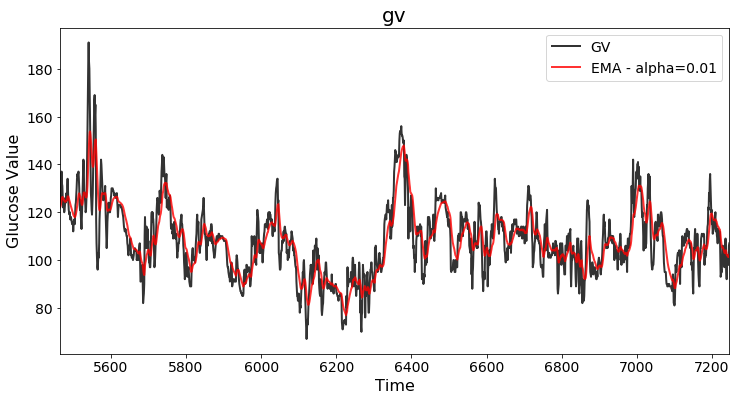

In [252]:
colors = ['black', 'red']

# line plot - the yearly average air temperature in Barcelona
df[['gv','gv_EMA_0.1']].plot(color=colors, linewidth=2, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['GV','EMA - alpha=0.05'], fontsize=14)

# title and labels
plt.title('gv', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Glucose Value', fontsize=16)

Text(0, 0.5, 'Glucose Value')

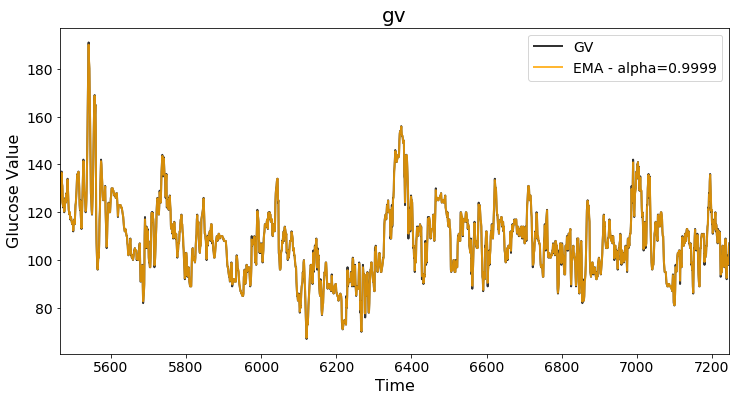

In [253]:
colors = ['black', 'orange']

# line plot - the yearly average air temperature in Barcelona
df[['gv','gv_EMA_0.9']].plot(color=colors, linewidth=2, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['GV','EMA - alpha=0.9999'], fontsize=14)

# title and labels
plt.title('gv', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Glucose Value', fontsize=16)